In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
wine_data = pd.read_csv("/content/WineQT.csv", sep=',')
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

In [6]:
if 'color' in wine_data.columns:
  wine_data = pd.get_dummies(wine_data, columns=['color'], drop_first=True)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [7]:
y_pred = dt_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.00      0.00         6
           5       0.80      0.54      0.65        96
           6       0.53      0.77      0.63        99
           7       0.25      0.19      0.22        26
           8       1.00      0.00      0.00         2

    accuracy                           0.58       229
   macro avg       0.72      0.30      0.30       229
weighted avg       0.63      0.58      0.57       229



In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 0  2  4  0  0]
 [ 0 52 43  1  0]
 [ 0 11 76 12  0]
 [ 0  0 21  5  0]
 [ 0  0  0  2  0]]


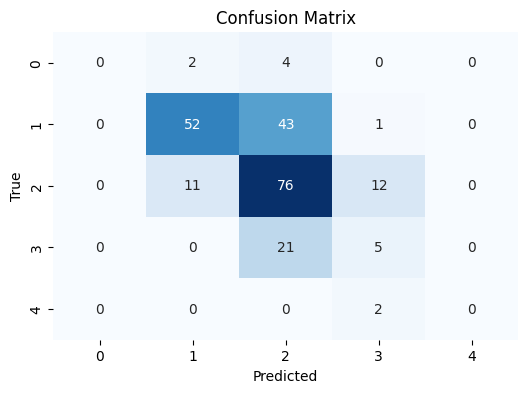

In [15]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

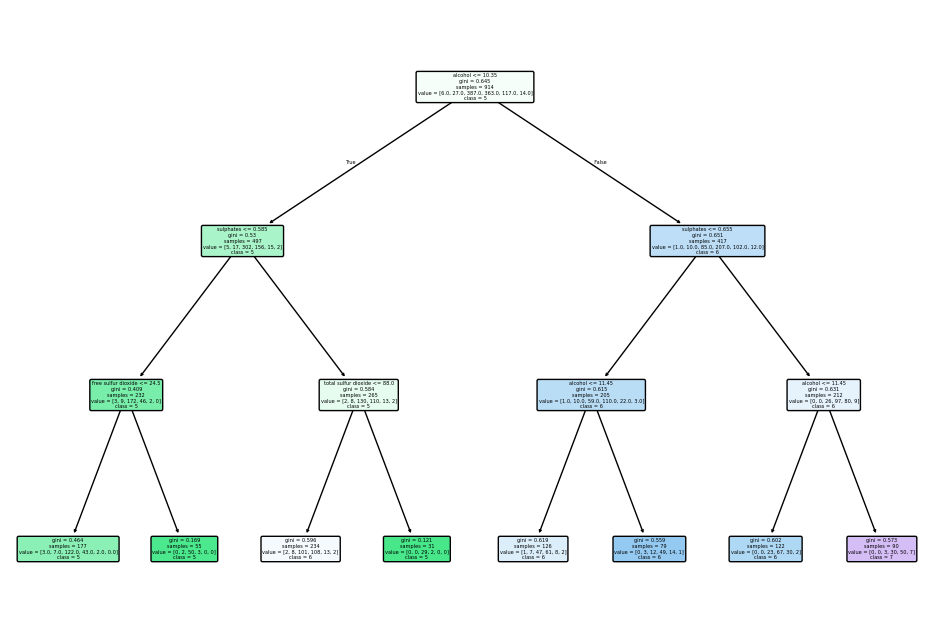

In [13]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_classifier, feature_names=X.columns, class_names=
[str(label) for label in dt_classifier.classes_], filled=True, rounded=True)
plt.show()